# Image Scraping

In [1]:
from tqdm import tqdm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from bs4 import BeautifulSoup as bs
import selenium
from selenium import webdriver 
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import StaleElementReferenceException
from selenium.common.exceptions import TimeoutException
from selenium.common.exceptions import WebDriverException
from selenium.common.exceptions import NoSuchElementException
import chromedriver_autoinstaller

import urllib.request
import requests
import ssl

import re
import cv2

import warnings
warnings.filterwarnings('ignore')
import shutil
import time

from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
# Full Dataset
final_cross = pd.read_csv('C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Final Dataset/Final_Cross.csv')

In [25]:
# Attempt with one single image

driver = webdriver.Chrome()
driver.maximize_window()
driver.get('https://images.google.com/')
element = driver.find_element(By.ID, 'L2AGLb')
element.click()
search_bar = driver.find_element(By.CLASS_NAME, 'gLFyf')
search_bar.send_keys('Greg Abbott')
search_bar.send_keys(u'\ue007')
all_images = driver.find_elements(By.XPATH,"//img[contains(@class,'Q4LuWd')]")
src = all_images[0].get_attribute('src')
origin = driver.find_element(By.CLASS_NAME, 'dmeZbb').text
print(origin)
urllib.request.urlretrieve(str(src), 'Greg_Abbott.jpg')
driver.close()

Greg Abbott - Texas.gov


In [ ]:
# Image Download Attempt with a subset of the data

data = pd.read_csv('FG_Female_1.csv')
full_names = np.array(data['First Name'] + ' ' + data['Last Name'] + ' ' + data['Title'])

driver =  webdriver.Chrome()
driver.get('https://images.google.com/')
cookie = driver.find_element(By.ID, 'L2AGLb')
cookie.click()

for i in range(len(full_names)):
    full_name = full_names[i]
    #driver = webdriver.Chrome()
    #driver.get('https://images.google.com/')
    #element = driver.find_element(By.ID, 'L2AGLb')
    #element.click()
    search_bar = driver.find_element(By.CLASS_NAME, 'gLFyf')
    search_bar.send_keys(full_name)
    search_bar.send_keys(u'\ue007')
    all_images = driver.find_elements(By.XPATH,"//img[contains(@class,'Q4LuWd')]")
    src = all_images[0].get_attribute('src')
    urllib.request.urlretrieve(str(src), f'{full_name}.jpg')
    #driver.close()
    driver.get('https://images.google.com/')

In [1]:
# Final Function

def img_download(data):
    
    good_sources = ['LinkedIn', 'Facebook', 'Wikipedia']
    origins = []
    good_origins = []
    data = data[(data['First Name'].notnull()) & (data['Last Name'].notnull()) & (data['Title'].notnull())]
    full_names = np.array(data['First Name'] + ' ' + data['Last Name'] + ' ' + data['Title'])

    driver =  webdriver.Chrome()
    driver.get('https://images.google.com/')
    cookie = driver.find_element(By.ID, 'L2AGLb')
    cookie.click()

    for i in range(len(full_names)):
        full_name = full_names[i]
        
        search_bar = driver.find_element(By.CLASS_NAME, 'gLFyf')
        search_bar.send_keys(full_name)
        search_bar.send_keys(u'\ue007')
        
        try: 
            all_images = driver.find_elements(By.XPATH,"//img[contains(@class,'Q4LuWd')]")
            src = all_images[0].get_attribute('src')

            origin = driver.find_element(By.CLASS_NAME, 'dmeZbb').text
            origins.append(origin)

            if good_sources[0] in origin or good_sources[1] in origin or good_sources[2] in origin:
                good_origins.append(1)
            else:
                good_origins.append(0)
                
            urllib.request.urlretrieve(str(src), f'{full_name}.jpg')
        
        except:
            origins.append(None)
            good_origins.append(None)
        driver.get('https://images.google.com/')
        
    data['Source'] = origins
    data['Good_Source'] = good_origins
    driver.close()
    return data

In [2]:
# Download Function

def download(names, folder):
    driver =  webdriver.Chrome()
    options = webdriver.ChromeOptions()
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    driver = webdriver.Chrome(options=options)
    driver.set_page_load_timeout(60)
    driver.get('https://images.google.com/')
    cookie = driver.find_element(By.ID, 'L2AGLb')
    cookie.click()

    for i in range(len(names)):
        full_name = names[i]
        
        search_bar = driver.find_element(By.CLASS_NAME, 'gLFyf')
        search_bar.send_keys(full_name)
        search_bar.send_keys(u'\ue007')
        
        try: 
            all_images = driver.find_elements(By.XPATH,"//img[contains(@class,'Q4LuWd')]")
            src = all_images[0].get_attribute('src')
            
            final_folder = folder + '/' + full_name + '.jpg'
            urllib.request.urlretrieve(str(src), final_folder)
        
        except:
            pass
        
        driver.get('https://images.google.com/')
        
    driver.close()

# Subsampling

In [13]:
# Origins Extraction Subsample (Title)

n = 500
data = final_cross
good_sources = ['LinkedIn', 'Facebook', 'Wikipedia', 'Twitter']
origins = []
good_origins = []
data = data[(data['First Name'].notnull()) & (data['Last Name'].notnull()) & (data['Title'].notnull())]
full_names = np.array(data['First Name'] + ' ' + data['Last Name'] + ' ' + data['Title'])
indexes = np.random.choice(np.arange(len(full_names)), size = n, replace = False)

driver =  webdriver.Chrome()
driver.get('https://images.google.com/')
cookie = driver.find_element(By.ID, 'L2AGLb')
cookie.click()

for i in range(n):
    full_name = full_names[indexes[i]]
    full_name = re.sub('[^a-zA-Z]', '', full_name)
    full_name = re.sub(r'\s+', '', full_name)

    search_bar = driver.find_element(By.CLASS_NAME, 'gLFyf')
    search_bar.send_keys(full_name)
    search_bar.send_keys(u'\ue007')

    origin = driver.find_element(By.CLASS_NAME, 'dmeZbb').text
    origins.append(origin)

    if good_sources[0] in origin or good_sources[1] in origin or good_sources[2] in origin:
        good_origins.append(1)
    else:
        good_origins.append(0)

    driver.get('https://images.google.com/')

driver.close()
perc_good = sum(good_origins)*100/len(good_origins)
print(f'Percentage of good origins: {perc_good}')

Percentange of good origins: 33.0


In [15]:
# Origins Extraction Subsample (LinkedIn)

n = 500
data = final_cross
good_sources = ['LinkedIn', 'Facebook', 'Wikipedia', 'Twitter']
origins = []
good_origins = []
data = data[(data['First Name'].notnull()) & (data['Last Name'].notnull())]
full_names = np.array(data['First Name'] + ' ' + data['Last Name'] + ' ' + 'LinkedIn')
indexes = np.random.choice(np.arange(len(full_names)), size = n, replace = False)

driver =  webdriver.Chrome()
driver.get('https://images.google.com/')
cookie = driver.find_element(By.ID, 'L2AGLb')
cookie.click()

for i in range(n):
    full_name = full_names[indexes[i]]
    full_name = re.sub('[^a-zA-Z]', '', full_name)
    full_name = re.sub(r'\s+', '', full_name)
    
    search_bar = driver.find_element(By.CLASS_NAME, 'gLFyf')
    search_bar.send_keys(full_name)
    search_bar.send_keys(u'\ue007')

    origin = driver.find_element(By.CLASS_NAME, 'dmeZbb').text
    origins.append(origin)

    if good_sources[0] in origin or good_sources[1] in origin or good_sources[2] in origin:
        good_origins.append(1)
    else:
        good_origins.append(0)

    driver.get('https://images.google.com/')

driver.close()
perc_good = sum(good_origins)*100/len(good_origins)
print(f'Percentage of good origins: {perc_good}')

Percentange of good origins: 93.0


In [6]:
# Origins Extraction Subsample (Title + LinkedIn)

n = 500
data = final_cross
good_sources = ['LinkedIn', 'Facebook', 'Wikipedia', 'Twitter']
origins = []
good_origins = []
data = data[(data['First Name'].notnull()) & (data['Last Name'].notnull()) & (data['Title'].notnull())]
full_names = np.array(data['First Name'] + ' ' + data['Last Name'] + ' ' + data['Title'] + ' ' + 'LinkedIn')
indexes = np.random.choice(np.arange(len(full_names)), size = n, replace = False)

driver =  webdriver.Chrome()
driver.get('https://images.google.com/')
cookie = driver.find_element(By.ID, 'L2AGLb')
cookie.click()

for i in range(n):
    full_name = full_names[indexes[i]]
    full_name = re.sub('[^a-zA-Z]', ' ', full_name)
    full_name = re.sub(r'\s+', ' ', full_name)

    search_bar = driver.find_element(By.CLASS_NAME, 'gLFyf')
    search_bar.send_keys(full_name)
    search_bar.send_keys(u'\ue007')

    origin = driver.find_element(By.CLASS_NAME, 'dmeZbb').text
    origins.append(origin)

    if good_sources[0] in origin or good_sources[1] in origin or good_sources[2] in origin:
        good_origins.append(1)
    else:
        good_origins.append(0)

    driver.get('https://images.google.com/')

driver.close()
perc_good = sum(good_origins)*100/len(good_origins)
print(f'Percentage of good origins: {perc_good}')

Percentage of good origins: 76.4


## N Images Comparison

In [37]:
def download_n(names, folder, n, destination_name):
    #chromedriver_autoinstaller.install()
    options = webdriver.ChromeOptions()
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    driver = webdriver.Chrome(executable_path='C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/chromedriver-win32/chromedriver-win32/chromedriver.exe', options=options)
    driver.set_page_load_timeout(60)
    driver.get('https://images.google.com/')
    cookie = driver.find_element(By.ID, 'L2AGLb')
    cookie.click()
    
    final_names = []
    origins_list = []
    src_list = []
    
    for i in tqdm(range(len(names))):
        full_name = names[i]
        while '/' in full_name:
            full_name.remove('/')
        
        search_bar = driver.find_element(By.CLASS_NAME, 'gLFyf')
        search_bar.send_keys(full_name)
        search_bar.send_keys(u'\ue007')
        
        time.sleep(2)
        
        all_images = driver.find_elements(By.XPATH, "//img[contains(@class,'Q4LuWd')]")
        all_origins = driver.find_elements(By.CLASS_NAME, 'LAA3yd')

        for j in range(min(n, len(all_images))):
            #print(j)
            src = all_images[j].get_attribute('src')
            src_list.append(src)
            origins_list.append(all_origins[j].text)
            final_name = full_name + '_' + str(j) +'.jpg'
            final_names.append(final_name)
            final_folder = folder + '/' + full_name + '_' + str(j) +'.jpg'
            urllib.request.urlretrieve(str(src), final_folder)
        driver.get('https://images.google.com/')
        
    final_dataset = pd.DataFrame()
    final_dataset['File Name'] = final_names
    final_dataset['src'] = src_list
    final_dataset['Origin'] = origins_list
    final_dataset.to_csv(destination_name)
    driver.close()

In [31]:
screenshots_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/Screenshots'
all_screenshots = os.listdir(screenshots_folder)

names_to_download = []

for i in tqdm(range(len(all_screenshots))):
    screenshot_name = all_screenshots[i][:-4] 
    names_to_download.append(screenshot_name)

100%|██████████████████████████████████████████████████████████████████████████| 3758/3758 [00:00<00:00, 469518.17it/s]


### 5 Images

In [8]:
final_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/LinkedIn_5'
final_names = np.array([names_to_download[i] + ' LinkedIn' for i in range(len(names_to_download))])
sample_size = 500
random_indexes = np.random.choice(np.arange(len(final_names)), size = sample_size, replace = False)
final_names_to_download = final_names[random_indexes]

start = time.time()
download_5(final_names_to_download, final_folder)
end = time.time()
print(f'Total Time: {end-start} seconds')

Total Time: 4377.534827232361 seconds


In [9]:
final_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/LinkedIn_Law_5'
final_names = np.array([names_to_download[i] + ' LinkedIn Law' for i in range(len(names_to_download))])
sample_size = 500
random_indexes = np.random.choice(np.arange(len(final_names)), size = sample_size, replace = False)
final_names_to_download = final_names[random_indexes]

start = time.time()
download_5(final_names_to_download, final_folder)
end = time.time()
print(f'Total Time: {(end-start)/60} minutes')

Total Time: 45.17804906368256 minutes


In [19]:
final_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/LinkedIn_Title_5'
print(final_cross[(final_cross['Full Name'].isin(names_to_download)) & (final_cross['Title'].notnull())].shape)
sub_final_cross = final_cross.loc[(final_cross['Full Name'].isin(names_to_download)) & (final_cross['Title'].notnull())].reset_index(drop = True)
final_names = []

for i in range(sub_final_cross.shape[0]):
    if str(sub_final_cross.loc[i, 'Title']) != 'nan':
        final_names.append(sub_final_cross.loc[i, 'Full Name'] + ' LinkedIn ' + sub_final_cross.loc[i, 'Title'])

final_names = np.array(final_names)
sample_size = 500
random_indexes = np.random.choice(np.arange(len(final_names)), size = sample_size, replace = False)
final_names_to_download = final_names[random_indexes]

start = time.time()
download_5(final_names_to_download, final_folder)
end = time.time()
print(f'Total Time: {(end-start)/60} minutes')

(1670, 42)
Total Time: 31.560354165236156 minutes


### 10 Images

In [29]:
final_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/LinkedIn_10'
final_names = np.array([names_to_download[i] + ' LinkedIn' for i in range(len(names_to_download))])
sample_size = 500
random_indexes = np.random.choice(np.arange(len(final_names)), size = sample_size, replace = False)
final_names_to_download = final_names[random_indexes]

download_n(final_names_to_download, final_folder, 10, 'LinkedIn_10_Origin.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [40:13<00:00,  4.83s/it]


In [30]:
final_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/Standard_10'
sample_size = 500
names_to_download = np.array(names_to_download)
random_indexes = np.random.choice(np.arange(len(names_to_download)), size = sample_size, replace = False)
final_names_to_download = names_to_download[random_indexes]

download_n(final_names_to_download, final_folder, 10, 'Standard_10_Origin.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [37:19<00:00,  4.48s/it]


In [32]:
final_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/LinkedIn_Law_10'
final_names = np.array([names_to_download[i] + ' LinkedIn Law' for i in range(len(names_to_download))])
sample_size = 500
random_indexes = np.random.choice(np.arange(len(final_names)), size = sample_size, replace = False)
final_names_to_download = final_names[random_indexes]

download_n(final_names_to_download, final_folder, 10, 'LinkedIn_Law_10_Origin.csv')

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [47:08<00:00,  5.66s/it]


In [38]:
final_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/LinkedIn_Title_10'
print(final_cross[(final_cross['Full Name'].isin(names_to_download)) & (final_cross['Title'].notnull())].shape)
sub_final_cross = final_cross.loc[(final_cross['Full Name'].isin(names_to_download)) & (final_cross['Title'].notnull())].reset_index(drop = True)
final_names = []

for i in range(sub_final_cross.shape[0]):
    if str(sub_final_cross.loc[i, 'Title']) != 'nan':
        final_names.append(sub_final_cross.loc[i, 'Full Name'] + ' LinkedIn ' + sub_final_cross.loc[i, 'Title'])

final_names = np.array(final_names)
sample_size = 500
random_indexes = np.random.choice(np.arange(len(final_names)), size = sample_size, replace = False)
final_names_to_download = final_names[random_indexes]

download_n(final_names_to_download, final_folder, 10, 'LinkedIn_Title_10_Origin.csv')

(1670, 42)


100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [49:44<00:00,  5.97s/it]


# Face Extraction Algorithm

In [6]:
url = 'https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
urllib.request.urlretrieve(url, 'haarcascade_frontalface_default.xml')

('haarcascade_frontalface_default.xml',
 <http.client.HTTPMessage at 0x1f775c58550>)

In [4]:
names_to_scrape = []
names = os.listdir('C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/Screenshots')
for i in range(len(names)):
    names_to_scrape.append(names[i][:-4])
print(names_to_scrape[:20])

['Aarnn Cilharman', 'Aaron Lozano', 'Abbe Dembowitz', 'Abby Holland', 'Abby Oakland', 'Adam B. Goodrum', 'Adam Ekbom', 'Adam Mitchell', 'Adanna M. Smith', 'Adela Lilollari', 'Aditi Shah', 'Adnan Muttalib', 'Adriel Williams', 'Ahmad H. Malik', 'Ahmed Farooq', 'Aileen Perez-Polanco', 'Alec Guy', 'Alec Nagel', 'Alec Weinberg', 'Alegna Gomez']


In [8]:
n = 20
full_names = []

for i in range(n):
    full_names.append(names_to_scrape[i] + ' LinkedIn')

download(full_names)

The detectMultiScale() method of the faceCascade object in OpenCV is used to detect objects (in this case, faces) in an input image. It takes the following parameters:

image: The input image on which the face detection is to be performed.
scaleFactor: Parameter specifying how much the image size is reduced at each image scale. This value is used to create a scale pyramid. Default value is 1.1.

minNeighbors: Parameter specifying how many neighbors each candidate rectangle should have to retain it. This parameter affects the quality of the detected faces. Higher values lead to fewer detections but with higher quality. Default value is 3.

minSize: Minimum size of the detected faces. Objects smaller than this size will not be detected. By default, it is set to (30, 30).

The detectMultiScale() method returns a list of rectangles, where each rectangle represents a detected face. The values in the list represent the coordinates of the top-left corner of each rectangle along with its width and height, i.e., (x, y, w, h).

In [12]:
folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping'
files = os.listdir(folder)

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

for i in range(len(files)):
    if files[i][-3:] == 'jpg':
        image_path = folder + '/' + files[i]
        image = cv2.imread(image_path)
        gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray_img,
                                             #scaleFactor=1.3,  
                                             #minSize=(30, 30)
                                             minNeighbors=1)
        for j in range(len(faces)):
            x = faces[j][0]
            y = faces[j][1]
            w = faces[j][2]
            h = faces[j][3]
            cv2.rectangle(gray_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
            roi_color = gray_img[y : y + h, x : x + w]
            cv2.imwrite(f'{files[i][:-4]}_Face_{j+1}.jpg', roi_color)

# Training Set Generation

In [106]:
folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/lfw/lfw'
files = os.listdir(folder)

people_to_keep = []
num_images = 0
for i in range(len(files)):
    new_folder = folder + '/' + files[i]
    if len(os.listdir(new_folder)) >= 2:
        people_to_keep.append(files[i])
        num_images += len(os.listdir(new_folder))
        
print(len(people_to_keep))
print(num_images)

1680
9164


In [107]:
# For training set

faces_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/training_faces'

x_dim = []
y_dim = []

for i in tqdm(range(len(people_to_keep))):
    current_folder = folder + '/' + people_to_keep[i]
    images = os.listdir(current_folder)
    for j in range(len(images)):
        image_dir = current_folder + '/' + images[j]
        image = cv2.imread(image_dir)
        gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray_img,
                                             #scaleFactor=1.3,  
                                             #minSize=(30, 30)
                                             minNeighbors=1)
        for k in range(len(faces)):
            x = faces[k][0]
            y = faces[k][1]
            w = faces[k][2]
            h = faces[k][3]
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            roi_color = image[y : y + h, x : x + w]
            x_dim.append(roi_color.shape[0])
            y_dim.append(roi_color.shape[1])
            name = faces_folder + '/' + images[j]
            cv2.imwrite(name, roi_color)

100%|██████████████████████████████████████████████████████████████████████████████| 1680/1680 [10:55<00:00,  2.56it/s]


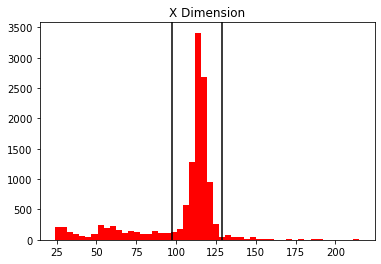

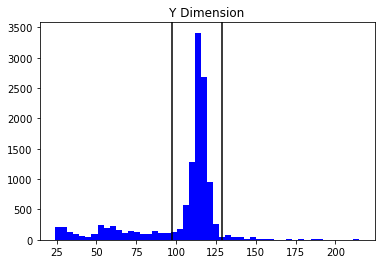

In [108]:
# Distributions of the dimensions

x_upper = np.median(x_dim) + 0.6*np.std(x_dim)
x_lower = np.median(x_dim) - 0.6*np.std(x_dim)
plt.hist(x_dim, bins = 50, color = 'r', density = False)
plt.axvline(x_upper, color = 'black')
plt.axvline(x_lower, color = 'black')
plt.title('X Dimension')
plt.show()
plt.hist(y_dim, bins = 50, color = 'b', density = False)
y_upper = np.median(y_dim) + 0.6*np.std(y_dim)
y_lower = np.median(y_dim) - 0.6*np.std(y_dim)
plt.axvline(y_upper, color = 'black')
plt.axvline(y_lower, color = 'black')
plt.title('Y Dimension')
plt.show()

In [109]:
# Exclusion of the outliers

x_dim = np.array(x_dim)
x_bounds = x_dim[(x_dim >= x_lower) & (x_dim <= x_upper)]
y_dim = np.array(y_dim)
y_bounds = y_dim[(y_dim >= y_lower) & (y_dim <= y_upper)]

new_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/training_faces_2'
old_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/training_faces'
old_images = os.listdir(old_folder)

for i in tqdm(range(len(old_images))):
    image_dir = old_folder + '/' + old_images[i]
    image = cv2.imread(image_dir)
    if image.shape[0] in x_bounds and image.shape[1] in y_bounds:
        shutil.move(image_dir, new_folder + '/' + old_images[i])

100%|██████████████████████████████████████████████████████████████████████████████| 9160/9160 [03:15<00:00, 46.89it/s]


In [116]:
names = os.listdir('C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/training_faces_2')
full_names = [' '.join(names[i].split('_')[:2]) for i in range(len(names))]
unique_names = set(full_names)
img_label = dict()
for i in range(len(unique_names)):
    img_label[list(unique_names)[i]] = i

name_counter = Counter(full_names)

"\nname_counter = dict()\nfor i in tqdm(range(len(unique_names))):\n    for j in range(len(names)):\n        if ' '.join(names[j].split('_')[:2]) == list(unique_names)[i]:\n            try:\n                name_counter[list(unique_names)[i]] += 1\n            except:\n                name_counter[list(unique_names)[i]] = 1\n"

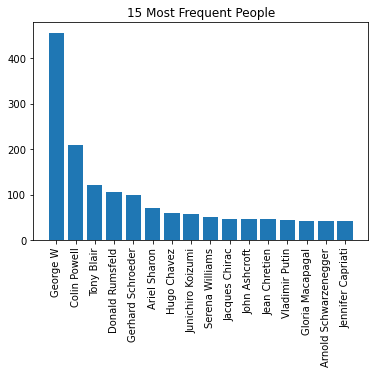

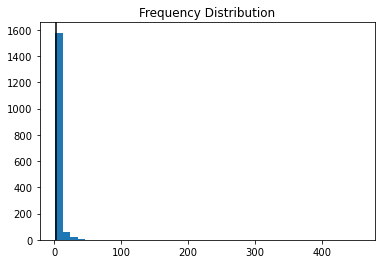

In [121]:
name_counter_data = pd.DataFrame()
name_counter_data['Name'] = name_counter.keys()
name_counter_data['Counter'] = name_counter.values()
name_counter_data = name_counter_data.sort_values('Counter', ascending = False).reset_index(drop = True)

x = np.array(name_counter_data.loc[:15, 'Name'])
y = np.array(name_counter_data.loc[:15, 'Counter'])
plt.bar(x, y)
plt.xticks(rotation = 90)
plt.title('15 Most Frequent People')
plt.show()

plt.hist(name_counter_data['Counter'], bins = 40)
plt.axvline(np.median(name_counter_data['Counter']), color = 'black')
plt.title('Frequency Distribution')
plt.show()

In [70]:
#For screenshots

old_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/Screenshots'
new_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/Screenshots_faces'

x_dim = []
y_dim = []
screenshots = os.listdir(old_folder)
for i in tqdm(range(len(screenshots))):
    image_dir = old_folder + '/' + screenshots[i]
    image = cv2.imread(image_dir)
    try: 
        gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray_img,
                                             #scaleFactor=1.3,  
                                             #minSize=(30, 30)
                                             minNeighbors=1)
        for k in range(len(faces)):
            x = faces[k][0]
            y = faces[k][1]
            w = faces[k][2]
            h = faces[k][3]
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            roi_color = image[y : y + h, x : x + w]
            x_dim.append(roi_color.shape[0])
            y_dim.append(roi_color.shape[1])
            name = new_folder + '/' + screenshots[i]
            cv2.imwrite(name, roi_color)
    except:
        pass

100%|████████████████████████████████████████████████████████████████████████████████| 715/715 [01:28<00:00,  8.11it/s]


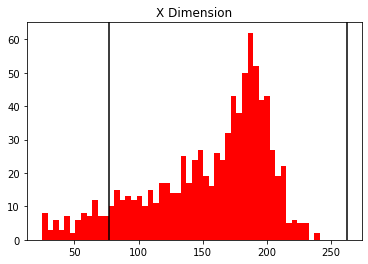

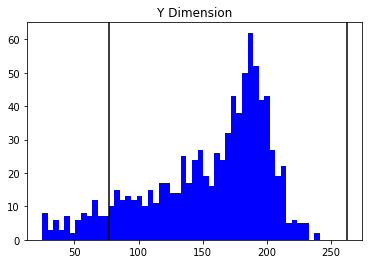

In [73]:
# Distributions of the dimensions

x_upper = np.median(x_dim) + 1.96*np.std(x_dim)
x_lower = np.median(x_dim) - 1.96*np.std(x_dim)
plt.hist(x_dim, bins = 50, color = 'r', density = False)
plt.axvline(x_upper, color = 'black')
plt.axvline(x_lower, color = 'black')
plt.title('X Dimension')
plt.show()
plt.hist(y_dim, bins = 50, color = 'b', density = False)
y_upper = np.median(y_dim) + 1.96*np.std(y_dim)
y_lower = np.median(y_dim) - 1.96*np.std(y_dim)
plt.axvline(y_upper, color = 'black')
plt.axvline(y_lower, color = 'black')
plt.title('Y Dimension')
plt.show()

In [76]:
# Exclusion of the outliers

x_dim = np.array(x_dim)
x_bounds = x_dim[(x_dim >= x_lower) & (x_dim <= x_upper)]
y_dim = np.array(y_dim)
y_bounds = y_dim[(y_dim >= y_lower) & (y_dim <= y_upper)]

new_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/Screenshots_faces_2'
os.makedirs(new_folder)
old_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/Screenshots_faces'
old_images = os.listdir(old_folder)

for i in tqdm(range(len(old_images))):
    image_dir = old_folder + '/' + old_images[i]
    image = cv2.imread(image_dir)
    if image.shape[0] in x_bounds and image.shape[1] in y_bounds:
        shutil.move(image_dir, new_folder + '/' + old_images[i])

100%|████████████████████████████████████████████████████████████████████████████████| 709/709 [00:25<00:00, 27.99it/s]


# Mean Squared Error Difference Comparison

In [168]:
def mean_sqrd(vectors):
    (x, y) = vectors
    return np.mean(np.sum((x - y)**2))

In [146]:
def make_pairs(data):
    pairs = []
    labels = []
    for i in tqdm(range(len(data['Name']))):
        current_label = data.loc[i, 'Label']
        pos_candidates = np.array(data.loc[(data['Label'] == current_label) & (data.index != i), 'Image'])
        if len(pos_candidates) >= 1:
            pos_choice = np.random.choice(pos_candidates)
            pairs.append([data.loc[i, 'Image'], pos_choice])
            labels.append(1)

        neg_candidates = np.array(data.loc[data['Label'] != current_label, 'Image'])
        if len(neg_candidates) >= 1:
            neg_choice = np.random.choice(neg_candidates)
            pairs.append([data.loc[i, 'Image'], neg_choice])
            labels.append(0)
    return (np.array(pairs), np.array(labels))

In [158]:
training_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/training_faces_2'
all_images = os.listdir(training_folder)

unique_names = set([' '.join(all_images[i].split('_')[:2]) for i in range(len(all_images))])
img_label = dict()
for i in range(len(unique_names)):
    img_label[list(unique_names)[i]] = i
    
images_data = pd.DataFrame()
images = []

for i in tqdm(range(len(all_images))):
    image_name = ' '.join(all_images[i].split('_')[:2])
    label = img_label[image_name]
    image_path = training_folder + '/' + all_images[i]

    image = cv2.imread(image_path, cv2.IMREAD_COLOR | cv2.IMREAD_IGNORE_ORIENTATION)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray_image = cv2.resize(gray_image, (110,110))

    images_data.loc[i, 'Name'] = image_name
    images.append(gray_image)
    images_data.loc[i, 'Label'] = label
    images_data.loc[i, 'Path'] = image_path

images_data['Image'] = images
images_data.head()

100%|█████████████████████████████████████████████████████████████████████████████| 7926/7926 [00:54<00:00, 146.10it/s]


,Name,Label,Path,Image
0,Aaron Peirsol,1457.0,C:/Users/jing/Documents/Bocconi/DSBA/Leadershi...,"[[150, 148, 150, 149, 151, 150, 152, 149, 150,..."
1,Aaron Peirsol,1457.0,C:/Users/jing/Documents/Bocconi/DSBA/Leadershi...,"[[150, 148, 150, 150, 150, 149, 150, 150, 150,..."
2,Aaron Peirsol,1457.0,C:/Users/jing/Documents/Bocconi/DSBA/Leadershi...,"[[151, 149, 151, 150, 150, 150, 150, 150, 151,..."
3,Aaron Peirsol,1457.0,C:/Users/jing/Documents/Bocconi/DSBA/Leadershi...,"[[150, 150, 151, 148, 150, 149, 151, 150, 150,..."
4,Aaron Sorkin,594.0,C:/Users/jing/Documents/Bocconi/DSBA/Leadershi...,"[[150, 149, 151, 148, 151, 149, 149, 150, 150,..."


In [159]:
(img_pairs, labels) = make_pairs(images_data)

100%|█████████████████████████████████████████████████████████████████████████████| 7926/7926 [00:34<00:00, 232.75it/s]


In [160]:
pos_pairs = img_pairs[list(np.where(labels == 1)[0])]
neg_pairs = img_pairs[list(np.where(labels == 0)[0])]

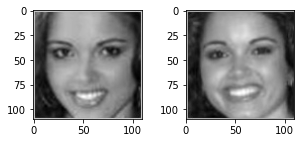

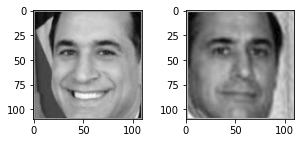

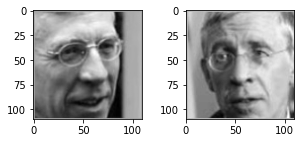

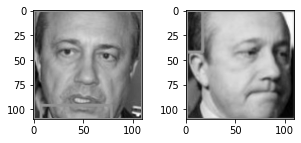

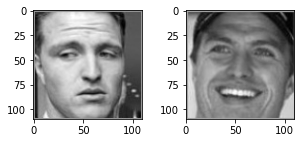

In [166]:
#Printing examples of positive pairs

positive = np.random.choice(np.where(labels == 1)[0], size = 5)
for index in positive:
    plt.figure(figsize=(5, 2))
    pair = img_pairs[index]
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.imshow(pair[i], cmap = 'gray')
    plt.show()

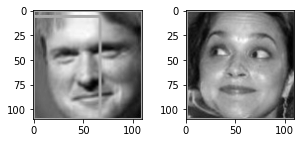

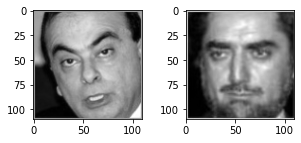

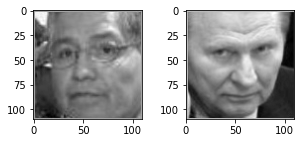

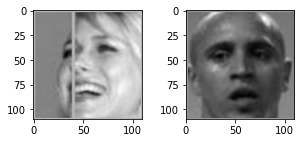

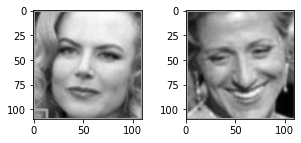

In [177]:
#Printing examples of negative pairs

negative = np.random.choice(np.where(labels == 0)[0], size = 5)
for index in negative:
    plt.figure(figsize=(5, 2))
    pair = img_pairs[index]
    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.imshow(pair[i], cmap = 'gray')
    plt.show()

100%|████████████████████████████████████████████████████████████████████████████| 7683/7683 [00:01<00:00, 4694.64it/s]


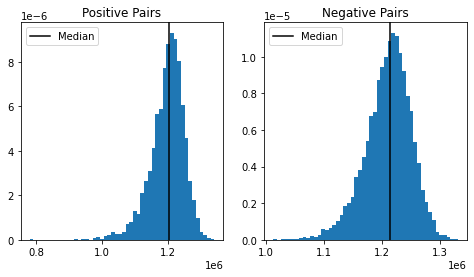

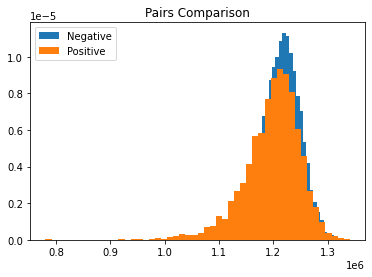

In [176]:
pos_diffs = []
neg_diffs = []

for i in tqdm(range(len(pos_pairs))):
    pos_diffs.append(mean_sqrd(pos_pairs[i]))
    neg_diffs.append(mean_sqrd(neg_pairs[i]))
    

plt.figure(figsize = (8,4))
plt.subplot(1, 2, 1)    
plt.hist(pos_diffs, bins = 50, density = True)
plt.axvline(np.median(pos_diffs), color = 'black', label = 'Median')
plt.title('Positive Pairs')
plt.legend()
plt.subplot(1, 2, 2)
plt.hist(neg_diffs, bins = 50, density = True)
plt.axvline(np.median(neg_diffs), color = 'black', label = 'Median')
plt.title('Negative Pairs')
plt.legend()
plt.show()

plt.figure(figsize = (6,4))
plt.hist(neg_diffs, bins = 50, label = 'Negative', density = True)
plt.hist(pos_diffs, bins = 50, label = 'Positive', density = True)
plt.title('Pairs Comparison')
plt.legend()
plt.show()

# DeepFace Model Selection

## Folders Preparation

In [13]:
#Folder for deepface

old_path = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/lfw'
new_path = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/all_images'
all_folders = os.listdir(old_path)
for i in tqdm(range(len(all_folders))):
    folder_path = old_path + '/' + all_folders[i]
    images = os.listdir(folder_path)
    for image in images:
        image_path = folder + '/' + image
        old_image_path = folder_path + '/' + image
        new_image_path = new_path + '/' + image
        shutil.move(old_image_path, new_image_path)

100%|██████████████████████████████████████████████████████████████████████████████| 5749/5749 [00:59<00:00, 96.89it/s]


In [16]:
old_path = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/all_images'
new_path = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/all_images_2'

all_images = os.listdir(old_path)
all_names = [' '.join(all_images[i].split('_')[:2]) for i in range(len(all_images))]
counter = Counter(all_names)

for i in tqdm(range(len(all_images))):
    if counter[' '.join(all_images[i].split('_')[:2])] >= 3:
        old_image_path = old_path + '/' + all_images[i]
        new_image_path = new_path + '/' + all_images[i]
        shutil.move(old_image_path, new_image_path)

100%|███████████████████████████████████████████████████████████████████████████| 13233/13233 [00:34<00:00, 385.49it/s]


## Results Analysis

In [29]:
all_models = pd.read_csv('Face_Comparison_Models.csv').drop('Unnamed: 0', axis = 1)
all_models.head()

,Path_1,Path_2,Label,Prediction,Distance,Model
0,/content/drive/MyDrive/all_images_2/Diana_Kral...,/content/drive/MyDrive/all_images_2/Gregg_Popo...,0.0,0.0,0.512540,VGG-Face
1,/content/drive/MyDrive/all_images_2/Colin_Powe...,/content/drive/MyDrive/all_images_2/Ed_Rosenth...,0.0,1.0,0.312990,VGG-Face
2,/content/drive/MyDrive/all_images_2/Sergey_Lav...,/content/drive/MyDrive/all_images_2/Antonio_Pa...,0.0,1.0,0.367013,VGG-Face
3,/content/drive/MyDrive/all_images_2/Conchita_M...,/content/drive/MyDrive/all_images_2/Conchita_M...,1.0,1.0,0.175841,VGG-Face
4,/content/drive/MyDrive/all_images_2/Justine_Pa...,/content/drive/MyDrive/all_images_2/Vicente_Fo...,0.0,0.0,0.777858,VGG-Face


In [34]:
models = ["VGG-Face", "Facenet", "Facenet512", "OpenFace", "DeepFace", "DeepID", "ArcFace", "Dlib", "SFace"]

for i in range(len(models)):
    try:
        model = models[i]
        print(model)
        tot = len(all_models.loc[all_models['Model'] == model, 'Label'])
        print('Sample size: ', str(len(all_models.loc[all_models['Model'] == model, 'Label'])))
        print('Accuracy: ', str(len(all_models.loc[(all_models['Label'] == all_models['Prediction']) & (all_models['Model'] == model), 'Label'])*100/tot))
        print('False Positive: ', str(len(all_models.loc[(all_models['Prediction'] == 1) & (all_models['Label'] == 0) & (all_models['Model'] == model), 'Label'])*100/tot))
        print('False Negative: ', str(len(all_models.loc[(all_models['Prediction'] == 0) & (all_models['Label'] == 1) & (all_models['Model'] == model), 'Label'])*100/tot))
        print('')
    except:
        print('No samples of ', model)
        print('')

VGG-Face
Sample size:  950
Accuracy:  82.3157894736842
False Positive:  12.631578947368421
False Negative:  5.052631578947368

Facenet
Sample size:  950
Accuracy:  84.63157894736842
False Positive:  0.21052631578947367
False Negative:  15.157894736842104

Facenet512
Sample size:  950
Accuracy:  75.47368421052632
False Positive:  0.0
False Negative:  24.526315789473685

OpenFace
Sample size:  950
Accuracy:  51.68421052631579
False Positive:  0.0
False Negative:  48.31578947368421

DeepFace
Sample size:  950
Accuracy:  60.63157894736842
False Positive:  3.0526315789473686
False Negative:  36.31578947368421

DeepID
Sample size:  0
No samples of  DeepID

ArcFace
Sample size:  950
Accuracy:  93.36842105263158
False Positive:  0.9473684210526315
False Negative:  5.684210526315789

Dlib
Sample size:  0
No samples of  Dlib

SFace
Sample size:  950
Accuracy:  86.0
False Positive:  0.10526315789473684
False Negative:  13.894736842105264



# Screenshots Comparison (No Origin)

## Folders Preparation

In [49]:
# Full Name + LinkedIn

folder_to = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/downloaded_images'
screenshots_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/Screenshots'
all_screenshots = os.listdir(screenshots_folder)

names_to_download = []

for i in tqdm(range(len(all_screenshots))):
    screenshot_name = all_screenshots[i][:-4] + ' LinkedIn'
    names_to_download.append(screenshot_name)
    
# download(names_to_download, folder_to)

100%|██████████████████████████████████████████████████████████████████████████| 3758/3758 [00:00<00:00, 341616.70it/s]


In [58]:
folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/downloaded_images'
current_downloaded = os.listdir(folder)
current_downloaded = [current_downloaded[i][:-4] for i in range(len(current_downloaded))]

names_to_download_2 = [names_to_download[i] for i in range(len(names_to_download)) if names_to_download[i] not in current_downloaded]

#download(names_to_download_2, folder_to)

In [2]:
# Full Name + Title + LinkedIn

final_cross = pd.read_csv('C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Final Dataset/Final_Cross.csv')

In [23]:
folder_to = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/downloaded_images_title'
screenshots_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/Screenshots'
all_screenshots = os.listdir(screenshots_folder)

names_to_download = []
names_to_copy = []
title_counter = 0

for i in tqdm(range(len(all_screenshots))):
    full_name = all_screenshots[i][:-4]
    first_name = full_name.split(' ')[0]
    last_name = full_name.split(' ')[1]
    try:
        title = list(final_cross.loc[(final_cross['First Name'] == first_name) & (final_cross['Last Name'] == last_name), 'Title'])[0]
        if title is not None and len(title) > 0:
            screenshot_name = full_name + ' ' + title + ' LinkedIn'
            names_to_download.append(screenshot_name)
            title_counter += 1
        else:
            names_to_copy.append(full_name + ' LinkedIn')
    except:
        screenshot_name =  full_name + ' LinkedIn'
        names_to_copy.append(screenshot_name)
    
    
print('% of titles: ', len(names_to_download)*100/len(names_to_download + names_to_copy))

100%|██████████████████████████████████████████████████████████████████████████████| 3758/3758 [13:20<00:00,  4.70it/s]

% of titles:  25.891431612559874


In [31]:
#download(names_to_download, folder_to)

In [34]:
folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/downloaded_images_title'
current_downloaded = os.listdir(folder)
current_downloaded = [current_downloaded[i][:-4] for i in range(len(current_downloaded))]

names_to_download_2 = [names_to_download[i] for i in range(len(names_to_download)) if names_to_download[i] not in current_downloaded]

#download(names_to_download_2, folder_to)

## Results Analysis

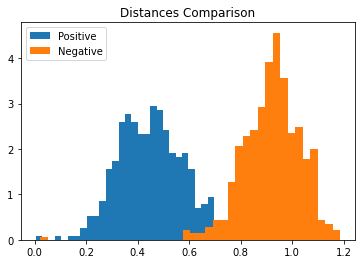

In [103]:
accuracies = pd.read_csv('Face_Comparison_Models.csv').drop('Unnamed: 0', axis = 1)
arcface = accuracies[accuracies['Model'] == 'ArcFace']
pos_distances = np.array(arcface.loc[arcface['Label'] == 1, 'Distance'])
neg_distances = np.array(arcface.loc[arcface['Label'] == 0, 'Distance'])

plt.hist(pos_distances, bins = 40, label = 'Positive', density = True)
plt.hist(neg_distances, bins = 40, label = 'Negative', density = True)
plt.legend()
plt.title('Distances Comparison')
plt.show()

In [94]:
#Logistic Model

x = np.array(arcface.loc[arcface['Distance'].notnull(), 'Distance']).reshape(-1, 1)
y = np.array(arcface.loc[arcface['Distance'].notnull(), 'Label'])

train_portion = 0.7
all_indexes = np.arange(len(y))
train_indexes = np.random.choice(all_indexes, size = int(train_portion*len(y)))
test_indexes = [el for el in all_indexes if el not in train_indexes]

x_train = x[train_indexes]
x_test = x[test_indexes]
y_train = y[train_indexes]
y_test = y[test_indexes]

model = LogisticRegression()
model.fit(x_train, y_train)

print('Train Size: ', int(train_portion*len(y)))
print('Intercept: ', model.intercept_)
print('Coefficient: ', model.coef_)

Train Size:  665
Intercept:  [6.14486375]
Coefficient:  [[-8.50228479]]


In [96]:
# Logit Evaluation

print('Model Accuracy: ', model.score(x_test, model.predict(x_test)))
print('')
print('')
print('Confusion Matrix:')
print(confusion_matrix(y_test, model.predict(x_test)))
print('')
print('')
print('Classification Report:')
print(classification_report(y_test, model.predict(x_test)))

Model Accuracy:  1.0


Confusion Matrix:
[[252   5]
 [ 20 196]]


Classification Report:
              precision    recall  f1-score   support

         0.0       0.93      0.98      0.95       257
         1.0       0.98      0.91      0.94       216

    accuracy                           0.95       473
   macro avg       0.95      0.94      0.95       473
weighted avg       0.95      0.95      0.95       473



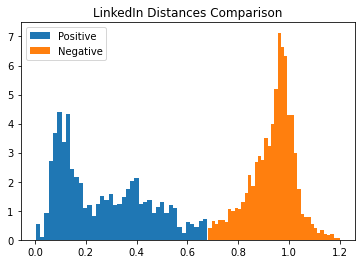

In [97]:
# LinkedIn

link_accuracies = pd.read_csv('ArcFace_LinkedIn_Accuracy.csv').drop('Unnamed: 0', axis = 1)
poslink_distances = np.array(link_accuracies.loc[link_accuracies['Prediction'] == True, 'Distance'])
neglink_distances = np.array(link_accuracies.loc[link_accuracies['Prediction'] == False, 'Distance'])

plt.hist(poslink_distances, bins = 40, label = 'Positive', density = True)
plt.hist(neglink_distances, bins = 40, label = 'Negative', density = True)
plt.legend()
plt.title('LinkedIn Distances Comparison')
plt.show()

In [101]:
# LinkedIn Download Accuracy - Logit

x = np.array(arcface.loc[arcface['Distance'].notnull(), 'Distance']).reshape(-1, 1)
y = np.array(arcface.loc[arcface['Distance'].notnull(), 'Label'])

model = LogisticRegression()
model.fit(x, y)

x_test = np.array(link_accuracies.loc[link_accuracies['Distance'].notnull(), 'Distance']).reshape(-1,1)

preds = model.predict(x_test)
print('Download Accuracy: ', preds.sum()*100/len(preds))

Download Accuracy:  42.53222137983321


# Screenshot Comparison (Origins Evaluation)

In [104]:
def download_origin(names, folder, n_images):
    
    driver =  webdriver.Chrome()
    options = webdriver.ChromeOptions()
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    driver = webdriver.Chrome(options=options)
    driver.set_page_load_timeout(60)
    driver.get('https://images.google.com/')
    cookie = driver.find_element(By.ID, 'L2AGLb')
    cookie.click()
    
    origins = []

    for i in range(len(names)):
        full_name = names[i]
        
        search_bar = driver.find_element(By.CLASS_NAME, 'gLFyf')
        search_bar.send_keys(full_name)
        search_bar.send_keys(u'\ue007')
        all_images = driver.find_elements(By.XPATH,"//img[contains(@class,'Q4LuWd')]")
        all_origins = driver.find_elements(By.CLASS_NAME, 'dmeZbb')
        
        for j in range(n_images):
            try: 
                src = all_images[j].get_attribute('src')

                final_folder = folder + '/' + full_name + f'{j}.jpg'
                urllib.request.urlretrieve(str(src), final_folder)
                
                origin = all_origins[j].text
                origins.append(origin)
                
            except:
                pass
        
        driver.get('https://images.google.com/')
        
    driver.close()
    
    return names, origins

## Preparation - Full Name

In [28]:
folder_to = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/downloaded_images_multiple'
screenshots_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/Screenshots'
all_screenshots = os.listdir(screenshots_folder)

names_to_download = []

for i in tqdm(range(len(all_screenshots))):
    screenshot_name = all_screenshots[i][:-4] 
    names_to_download.append(screenshot_name)
    
names, origins = download_origin(names_to_download, folder_to, 5)

100%|██████████████████████████████████████████████████████████████████████████| 3758/3758 [00:00<00:00, 469672.06it/s]


In [39]:
origins_data = pd.DataFrame()
all_images = os.listdir('C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/downloaded_images_multiple')
names = []
file_names = []
for i in range(len(all_images)):
    names.append(all_images[i][:-5])
    file_names.append(all_images[i])

origins_data['Name'] = names
origins_data['Origin'] = origins
origins_data['File Name'] = file_names

origins_data.head()
#origins_data.to_csv('Images_Origins.csv')

,Name,Origin,File Name
0,Aadika Singh,ACLU of Alaska,Aadika Singh0.jpg
1,Aadika Singh,RocketReach,Aadika Singh1.jpg
2,Aadika Singh,Behance,Aadika Singh2.jpg
3,Aadika Singh,Flickr,Aadika Singh3.jpg
4,Aadika Singh,LinkedIn,Aadika Singh4.jpg


## Preparation - Full Name + Law Firm

In [106]:
folder_to = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/downloaded_images_law'
screenshots_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/Screenshots'
all_screenshots = os.listdir(screenshots_folder)

names_to_download = []

for i in tqdm(range(len(all_screenshots))):
    screenshot_name = all_screenshots[i][:-4] + ' law firm'
    names_to_download.append(screenshot_name)
    
names, origins = download_origin(names_to_download, folder_to, 1)

100%|██████████████████████████████████████████████████████████████████████████| 3758/3758 [00:00<00:00, 751439.48it/s]


In [110]:
origins_data = pd.DataFrame()
all_images = os.listdir('C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/downloaded_images_law')
names = []
file_names = []
for i in range(len(all_images)):
    names.append(all_images[i][:-5])
    file_names.append(all_images[i])

origins_data['Name'] = names
origins_data['Origin'] = origins
origins_data['File Name'] = file_names

origins_data.head()
#origins_data.to_csv('Images_Origins_Law.csv')

,Name,Origin,File Name
0,A. Paul Paul Pineau law firm,JHU Hub - Johns Hopkins University,A. Paul Paul Pineau law firm0.jpg
1,Aadika Singh law firm,ACLU of Alaska,Aadika Singh law firm0.jpg
2,Aarnn Cilharman law firm,www.aaronhalegua.com,Aarnn Cilharman law firm0.jpg
3,Aaron Bowling law firm,Arnold & Porter,Aaron Bowling law firm0.jpg
4,Aaron Clay law firm,Finnegan,Aaron Clay law firm0.jpg


In [8]:
#Faces Extraction

current_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/downloaded_images_law'
all_images = os.listdir(current_folder)
faces_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/downloaded_images_law_faces'

paths = []
names = []
y_dim = []
x_dim = []

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

for j in tqdm(range(len(all_images))):
    try:
        image_dir = current_folder + '/' + all_images[j]
        image = cv2.imread(image_dir)
        gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = faceCascade.detectMultiScale(gray_img,
                                             #scaleFactor=1.3,  
                                             #minSize=(30, 30)
                                             minNeighbors=1)
        for k in range(1):
            x = faces[k][0]
            y = faces[k][1]
            w = faces[k][2]
            h = faces[k][3]
            cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
            roi_color = image[y : y+h, x : x+w]
            x_dim.append(roi_color.shape[0])
            y_dim.append(roi_color.shape[1])
            path_to = faces_folder + '/' + all_images[j]
            paths.append(path_to)
            names.append(all_images[j][:-5])
            cv2.imwrite(path_to, roi_color)
    except:
        paths.append(None)
        names.append(all_images[j][:-5])

100%|██████████████████████████████████████████████████████████████████████████████| 3755/3755 [04:07<00:00, 15.14it/s]


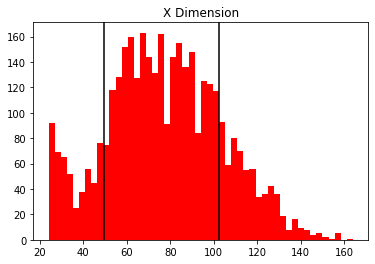

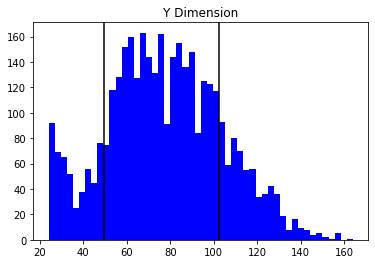

In [11]:
# Distributions of the dimensions

n = 1

x_upper = np.median(x_dim) + n*np.std(x_dim)
x_lower = np.median(x_dim) - n*np.std(x_dim)
plt.hist(x_dim, bins = 50, color = 'r', density = False)
plt.axvline(x_upper, color = 'black')
plt.axvline(x_lower, color = 'black')
plt.title('X Dimension')
plt.show()
plt.hist(y_dim, bins = 50, color = 'b', density = False)
y_upper = np.median(y_dim) + n*np.std(y_dim)
y_lower = np.median(y_dim) - n*np.std(y_dim)
plt.axvline(y_upper, color = 'black')
plt.axvline(y_lower, color = 'black')
plt.title('Y Dimension')
plt.show()

# LinkedIn Scraping

## Dataset Analysis

In [364]:
ll = pd.read_csv('C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Final Dataset/Final_Cross.csv').drop('Unnamed: 0', axis = 1)

In [356]:
not_null = ll[ll['Organization Name (Parent)'].notnull()].shape[0]*100/ll.shape[0]
print(f'% with Organization: {not_null}')

% with Organization: 53.523964537433656


In [357]:
ll_names = []
for i in tqdm(range(ll.shape[0])):
    first_name = str(ll.loc[i, 'First Name'])
    middle_name = str(ll.loc[i, 'Middle Name'])
    last_name = str(ll.loc[i, 'Last Name'])
    if middle_name == 'nan':
        full_name = first_name + ' ' + last_name
    else:
        full_name = first_name + ' ' + middle_name + ' ' + last_name
    ll_names.append(full_name)
    
screenshot_names = []
screenshots_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/Screenshots'
all_screenshots = os.listdir(screenshots_folder)
for i in tqdm(range(len(all_screenshots))):
    screenshot_name = all_screenshots[i][:-4] 
    screenshot_names.append(screenshot_name)

100%|██████████████████████████████████████████████████████████████████████████| 3758/3758 [00:00<00:00, 528843.97it/s]


In [362]:
intersection = len(set(screenshot_names).intersection(set(ll_names)))*100/len(set(screenshot_names))
print(f'Screenshots in the dataset: {intersection}%')

Screenshots in the dataset: 86.64183076104311%


In [37]:
folder_to = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/linkedin_images'
ssl._create_default_https_context = ssl._create_unverified_context

driver =  webdriver.Chrome()
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
#options.add_argument('— incognito')
options.add_argument('--disable-dev-shm-usage')
#options.add_argument('--headless')
options.add_argument('--disable-gpu')
driver = webdriver.Chrome(options=options)
driver.set_page_load_timeout(60)
driver.get('https://www.linkedin.com/feed/')
account = driver.find_element(By.CLASS_NAME, 'main__sign-in-link')
account.click()
time.sleep(1)
username = driver.find_element(By.ID, 'username')
username.send_keys('alex-lucchini@virgilio.it')
time.sleep(1)
password = driver.find_element(By.ID, 'password')
password.send_keys('Lcclxa99t.26-LN')
time.sleep(1)
password.send_keys(u'\ue007')
time.sleep(1)

search_field = driver.find_element(By.XPATH, '//*[@id="global-nav-typeahead"]/input')
search_field.send_keys('Bill Gates')
search_field.send_keys(u'\ue007')
time.sleep(4)

In [34]:
wait = WebDriverWait(driver, 10)
elements = wait.until(EC.element_to_be_clickable((By.XPATH, '//*[@id="Mk7c59mcTbKqY5d4AJ7d2g=="]/div/div[2]/a')))

In [36]:
elements.click()

## Single Person Attempt

In [12]:
folder_to = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/linkedin_images'
ssl._create_default_https_context = ssl._create_unverified_context

driver =  webdriver.Chrome()
options = webdriver.ChromeOptions()
options.add_argument('--no-sandbox')
#options.add_argument('— incognito')
options.add_argument('--disable-dev-shm-usage')
#options.add_argument('--headless')
options.add_argument('--disable-gpu')
driver = webdriver.Chrome(options=options)
driver.set_page_load_timeout(60)
driver.get('https://www.linkedin.com/feed/')
account = driver.find_element(By.CLASS_NAME, 'main__sign-in-link')
account.click()
time.sleep(1)
username = driver.find_element(By.ID, 'username')
username.send_keys('alex-lucchini@virgilio.it')
time.sleep(1)
password = driver.find_element(By.ID, 'password')
password.send_keys('Lcclxa99t.26-LN')
time.sleep(1)
password.send_keys(u'\ue007')
time.sleep(1)

search_field = driver.find_element(By.XPATH, '//*[@id="global-nav-typeahead"]/input')
search_field.send_keys('Christine Lagarde')
search_field.send_keys(u'\ue007')
time.sleep(4)

elements = driver.find_elements(By.CLASS_NAME, 'app-aware-link')
for i in range(len(elements)):
    if elements[i].text == 'Vedi tutti i risultati - Persone':
        elements[i].click()
        break
        
time.sleep(4)
all_people = driver.find_elements(By.CLASS_NAME, 'app-aware-link')

clickable = []
for i in range(len(all_people)):
    name = all_people[i].text.lower()
    if 'christine' in name or 'lagarde' in name:
        if all_people[i].get_attribute('href') not in clickable:
            clickable.append(all_people[i].get_attribute('href'))
            
driver.get(clickable[0])
time.sleep(2)
all_el = driver.find_elements(By.XPATH, "//*[contains(@id, 'ember')]")
els = [el.text for el in all_el]
for i in range(len(els)):
    if els[i][:10] == 'Esperienza':
        exp = els[i]
        
exp = np.unique(np.array(exp.split('\n')))
image = driver.find_element(By.XPATH, '/html/body/div[6]/div[3]/div/div/div[2]/div/div/main/section[1]/div[2]/div[1]/div[1]/div/button/img')
src = image.get_attribute('src')
urllib.request.urlretrieve(str(src), 'Christine Lagarde.jpg')
exp

array(['1999 - 2004 · 5 anni', '2007 - 2010 · 3 anni', 'Baker McKenzie',
       'Chairman of the Global Strategic Committee', 'Chicago',
       'Esperienza', 'European Central Bank', 'France Finance Minister',
       'Frankfurt Am Main Area, Germany', 'International Monetary Fund',
       'Managing Director', 'Ministry of Finance, France',
       'Paris, France', 'President of the European Central Bank',
       'Washington, D.C.', 'lug 2011 - set 2019 · 8 anni 3 mesi',
       'nov 2019 - Presente · 3 anni 7 mesi'], dtype='<U42')

## Multiple Images 

In [2]:
final_cross = pd.read_csv('C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Final Dataset/Final_Cross.csv').drop('Unnamed: 0', axis = 1)

In [3]:
final_panel = pd.read_csv('C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Final Dataset/Final_Panel.csv').drop('Unnamed: 0', axis = 1)

In [2]:
folder_to = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/linkedin_images'
screenshots_folder = 'C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Image Scraping/Screenshots'
all_screenshots = os.listdir(screenshots_folder)

names_to_download = []

for i in tqdm(range(len(all_screenshots))):
    screenshot_name = all_screenshots[i][:-4] 
    names_to_download.append(screenshot_name)

100%|██████████████████████████████████████████████████████████████████████████| 3758/3758 [00:00<00:00, 626428.52it/s]


In [5]:
all_data_names = []
for i in tqdm(range(final_cross.shape[0])):
    full_name = ''
    if str(final_cross.loc[i, 'First Name']) != 'nan':
        full_name += final_cross.loc[i, 'First Name']
    if str(final_cross.loc[i, 'Middle Name']) != 'nan':
        full_name += ' '
        full_name += final_cross.loc[i, 'Middle Name']
    if str(final_cross.loc[i, 'Last Name']) != 'nan':
        full_name += ' ' 
        full_name += final_cross.loc[i, 'Last Name']
    all_data_names.append(full_name)

final_cross['Full Name'] = all_data_names

100%|██████████████████████████████████████████████████████████████████████████████| 937552/937552 [02:27<00:00, 6364.78it/s]


In [5]:
all_data_names = []
for i in tqdm(range(final_panel.shape[0])):
    full_name = ''
    if str(final_panel.loc[i, 'First Name']) != 'nan':
        full_name += final_panel.loc[i, 'First Name']
    if str(final_panel.loc[i, 'Middle Name']) != 'nan':
        full_name += ' '
        full_name += final_panel.loc[i, 'Middle Name']
    if str(final_panel.loc[i, 'Last Name']) != 'nan':
        full_name += ' ' 
        full_name += final_panel.loc[i, 'Last Name']
    all_data_names.append(full_name)

final_panel['Full Name'] = all_data_names

100%|████████████████████████████████████████████████████████████████████████████| 3501449/3501449 [09:17<00:00, 6279.42it/s]


In [6]:
#final_panel.to_csv('C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Final Dataset/Final_Panel.csv')

In [20]:
#final_cross.to_csv('C:/Users/jing/Documents/Bocconi/DSBA/Leadership Connect/Final Dataset/Final_Cross.csv')

In [6]:
all_data_names = final_cross['Full Name']
names_to_download = set(names_to_download).intersection(set(all_data_names))
names_to_download = list(final_cross.loc[((final_cross['Organization Name (Parent)'].notnull() | (final_cross['Careers'].notnull())) & (final_cross['Full Name'].isin(names_to_download))), 'Full Name'])

In [7]:
len(set(names_to_download).intersection(set(all_data_names)))*100/len(set(names_to_download))

100.0

In [3]:
def linkedin_login(email, password_text):
    driver =  webdriver.Chrome()
    options = webdriver.ChromeOptions()
    options.add_argument('--no-sandbox')
    #options.add_argument('— incognito')
    options.add_argument('--disable-dev-shm-usage')
    #options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    driver = webdriver.Chrome(options=options)
    driver.set_page_load_timeout(60)
    driver.get('https://www.linkedin.com/feed/')
    account = driver.find_element(By.CLASS_NAME, 'main__sign-in-link')
    account.click()
    time.sleep(1)
    username = driver.find_element(By.ID, 'username')
    username.send_keys(email)
    time.sleep(1)
    password = driver.find_element(By.ID, 'password')
    password.send_keys(password_text)
    time.sleep(1)
    password.send_keys(u'\ue007')

In [23]:
linkedin_login('alex-lucchini@virgilio.it', 'Lcclxa99t.26-LN')

In [8]:
def linkedin_scraping(email, password_text, names):
    
    start = time.time()
    ssl._create_default_https_context = ssl._create_unverified_context

    all_images = []
    all_experiences = []
    all_names = []

    driver =  webdriver.Chrome()
    options = webdriver.ChromeOptions()
    options.add_argument('--no-sandbox')
    #options.add_argument('— incognito')
    options.add_argument('--disable-dev-shm-usage')
    #options.add_argument('--headless')
    options.add_argument('--disable-gpu')
    driver = webdriver.Chrome(options=options)
    driver.set_page_load_timeout(60)
    driver.get('https://www.linkedin.com/feed/')
    account = driver.find_element(By.CLASS_NAME, 'main__sign-in-link')
    account.click()
    time.sleep(1)
    username = driver.find_element(By.ID, 'username')
    username.send_keys(email)
    time.sleep(1)
    password = driver.find_element(By.ID, 'password')
    password.send_keys(password_text)
    time.sleep(1)
    password.send_keys(u'\ue007')
    time.sleep(1)

    #accept = driver.find_element(By.CLASS_NAME, 'artdeco-button__text')
    #accept.click() 

    for i in tqdm(range(len(names))):
        #Insertion of the name
        full_name = names[i]
        first_name = full_name.split(' ')[0]
        last_name = full_name.split(' ')[-1]
        time.sleep(1)
        search_field = driver.find_element(By.XPATH, '//*[@id="global-nav-typeahead"]/input')
        search_field.send_keys(full_name)
        search_field.send_keys(u'\ue007')

        time.sleep(4)

        #Selection of the list of all individuals
        elements = driver.find_elements(By.CLASS_NAME, 'app-aware-link')
        for i in range(len(elements)):
            if elements[i].text == 'Vedi tutti i risultati - Persone':
                elements[i].click()
                break
        time.sleep(4)


        wait = WebDriverWait(driver, 10)
        all_people = wait.until(EC.element_to_be_clickable((By.CLASS_NAME, 'app-aware-link')))
        all_people = driver.find_elements(By.CLASS_NAME, 'app-aware-link')
        clickable = []
        for i in range(len(all_people)):
            name = all_people[i].text.lower()
            if first_name.lower() in name or last_name.lower() in name:
                if all_people[i].get_attribute('href') not in clickable:
                    clickable.append(all_people[i].get_attribute('href'))
        time.sleep(2)

        for j in range(min(5, len(clickable))):
            driver.get(clickable[j])
            time.sleep(4)

            all_el = driver.find_elements(By.XPATH, "//*[contains(@id, 'ember')]")
            els = []
            for el in all_el:
                attempts_counter = 0
                while attempts_counter < 5: 
                    try:
                        #time.sleep(1)
                        els.append(el.text)
                        break
                    except StaleElementReferenceException:
                        attempts_counter += 1
                    except  WebDriverException:
                        attempts_counter += 1
            time.sleep(2)

            for h in range(len(els)):
                if els[h][:10] == 'Esperienza':
                    exp = np.unique(np.array(els[h].split('\n')))
                    exp = [el.lower() for el in exp]
                    break

            time.sleep(2)

            if h < len(els) - 1:
                attempt = 0
                while attempt < 5:
                    try:
                        image = WebDriverWait(driver, 20).until(EC.presence_of_element_located((By.XPATH, '/html/body/div[6]/div[3]/div/div/div[2]/div/div/main/section[1]/div[2]/div[1]/div[1]/div/button/img')))
                        image = driver.find_element(By.XPATH, '/html/body/div[6]/div[3]/div/div/div[2]/div/div/main/section[1]/div[2]/div[1]/div[1]/div/button/img')
                        src = image.get_attribute('src')
                        name = full_name + '_' + str(j)
                        all_names.append(name)
                        all_images.append(str(src))
                        all_experiences.append(exp)
                        break
                    except TimeoutException:
                        driver.get(clickable[j])
                        attempt += 1
                    except NoSuchElementException:
                        driver.get(clickable[j])
                        attempt += 1
    
        driver.get('https://www.linkedin.com/feed/')
    driver.close()

    end = time.time()
    print(f'Total Time for {len(names)} people: {end-start} seconds')
    return all_names, all_images, all_experiences

In [9]:
def exp_cleaning(all_experiences):
    
    for i in tqdm(range(len(all_experiences))):
        while '' in all_experiences[i]:
            all_experiences[i].remove('')
        for j in range(len(all_experiences[i])):
            all_experiences[i][j] = all_experiences[i][j].lower()
            if all_experiences[i][j][0] == ' ':
                all_experiences[i][j] = all_experiences[i][j][1:]
            if all_experiences[i][j][-1] == ' ':
                all_experiences[i][j] = all_experiences[i][j][:-1]
                
    return all_experiences

In [10]:
def link_data(all_names, all_experiences, all_images):
    
    linkedin = pd.DataFrame()
    simple_names = [all_names[i][:-2] for i in range(len(all_names))]
    exps = ['/'.join(all_experiences[i]) for i in range(len(all_experiences))]
    linkedin['Code Name'] = all_names
    linkedin['Full Name'] = simple_names
    linkedin['Image'] = all_images
    linkedin['Experience'] = exps
    
    linkedin = linkedin[linkedin['Image'] != 'data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7'].reset_index(drop = True)
    linkedin = linkedin.drop_duplicates('Image').reset_index(drop = True)
    
    return linkedin

In [ ]:
n = 1

emails = ['alex-lucchini@virgilio.it','leadershipconnect1@gmail.com']*n
passwords = ['Lcclxa99t.26-LN', 'Leadership_Connect_1']*n
credentials = dict()
for i in range(len(emails)):
    credentials[emails[i]] = passwords[i]
    
sleep_time = 3600

for i in range(1):
    names = list(names_to_download)[500+50*i:550+50*i]
    all_names, all_images, all_experiences = linkedin_scraping(email=emails[i], password_text = credentials[emails[i]], names = names)
    all_experiences = exp_cleaning(all_experiences)
    link_dataset = link_data(all_names, all_experiences, all_images)
    link_dataset.to_csv(f'Linkedin_Scraping_{i+1}.csv')
    #time.sleep(sleep_time)

### Match Search

In [5]:
linkedin = pd.read_csv('Linkedin_Scraping.csv').drop('Unnamed: 0', axis = 1).drop_duplicates('Image').drop_duplicates('Experience').reset_index(drop = True)
linkedin.head()

,Code Name,Full Name,Image,Experience
0,Hasan Ali_0,Hasan Ali,https://media.licdn.com/dms/image/C4E03AQHKDP9...,urban & indoor furniture/(business development...
1,Hasan Ali_1,Hasan Ali,https://media.licdn.com/dms/image/C5603AQFLwjz...,esperienza/it help desk/it manager/one team sr...
2,Hasan Ali_4,Hasan Ali,https://media.licdn.com/dms/image/C5603AQGgsFN...,- to ensure the team is collaborating closely ...
3,Timothy Brennan_1,Timothy Brennan,https://media.licdn.com/dms/image/C4E03AQEojzW...,"charlottesville, virginia, united states/esper..."
4,Timothy Brennan_3,Timothy Brennan,https://media.licdn.com/dms/image/C5603AQFt2kv...,"a tempo pieno · 4 anni 10 mesi/boston, massach..."


In [8]:
unique_names = list(set(linkedin['Full Name']))
sub_data = final_panel[final_panel['Full Name'].isin(names_to_download)].reset_index(drop = True)
print(sub_data.shape)
sub_data.head()

(14224, 45)


,Leadership People Id,Prefix,First Name,Middle Name,Nickname,Last Name,Maiden Name,Suffix,Credentials,Title,...,Careers,Other Current Roles,Political Affiliation,Gender,Start Date,Full Job,Current Start Date,Other Current,End Date,Full Name
0,1078115.0,NaN,Hasan,NaN,NaN,Ali,NaN,NaN,NaN,"Partner, Associate General Counsel, Quantum Co...",...,"Legal Intern, Office of the District Attorney,...",NaN,NaN,M,09/2022,"Partner, Associate General Counsel, Quantum Co...",09/2022,0.0,NaN,Hasan Ali
1,1078115.0,NaN,Hasan,NaN,NaN,Ali,NaN,NaN,NaN,Legal Intern,...,"Legal Intern, Office of the District Attorney,...",NaN,NaN,M,2008,"Legal Intern, Office of the District Attorney,...",09/2022,0.0,2008,Hasan Ali
2,1078115.0,NaN,Hasan,NaN,NaN,Ali,NaN,NaN,NaN,Summer Associate,...,"Legal Intern, Office of the District Attorney,...",NaN,NaN,M,2009,"Summer Associate, Cadwalader (2009-2009)",09/2022,0.0,2009,Hasan Ali
3,1078115.0,NaN,Hasan,NaN,NaN,Ali,NaN,NaN,NaN,Editor-in-Chief,...,"Legal Intern, Office of the District Attorney,...",NaN,NaN,M,2009,"Editor-in-Chief, Journal of Science and Techn...",09/2022,0.0,2010,Hasan Ali
4,1078115.0,NaN,Hasan,NaN,NaN,Ali,NaN,NaN,NaN,Law Clerk,...,"Legal Intern, Office of the District Attorney,...",NaN,NaN,M,2010,"Law Clerk, Committee on the Judiciary, United...",09/2022,0.0,2010,Hasan Ali


In [9]:
all_jobs = []
jobs_column = []

for i in tqdm(range(len(unique_names))):
    jobs_parent = list(sub_data.loc[sub_data['Full Name'] == unique_names[i], 'Organization Name (Parent)'])
    jobs_middle = list(sub_data.loc[sub_data['Full Name'] == unique_names[i], 'Organization Name (Intermediate)'])
    jobs_child = list(sub_data.loc[sub_data['Full Name'] == unique_names[i], 'Organization Name (Child)'])
    jobs_parent_acro = list(sub_data.loc[sub_data['Full Name'] == unique_names[i], 'Organization Acronym (Parent)'])
    jobs_intermediate_acro = list(sub_data.loc[sub_data['Full Name'] == unique_names[i], 'Organization Acronym (Intermediate)'])
    jobs_child_acro = list(sub_data.loc[sub_data['Full Name'] == unique_names[i], 'Organization Acronym (Child)'])
    jobs = jobs_parent + jobs_middle + jobs_child + jobs_parent_acro + jobs_intermediate_acro + jobs_child_acro
    
    to_be_removed = []
    
    for j in range(len(jobs)):
        if not isinstance(jobs[j], float):
            jobs[j] = jobs[j].lower()
            if jobs[j][0] == ' ':
                jobs[j] = jobs[j][1:]
            if jobs[j][-1] == ' ':
                jobs[j] = jobs[j][:-1]
        else:
            to_be_removed.append(jobs[j])
            
    jobs = list(jobs)
    for el in to_be_removed:
        jobs.remove(el)
    all_jobs.append(jobs)
    
    jobs_column.append('/'.join(jobs))

jobs_people = pd.DataFrame()
jobs_people['Full Name'] = unique_names
jobs_people['Experience'] = jobs_column

jobs_people.head()

100%|████████████████████████████████████████████████████████████████████████████████| 223/223 [00:05<00:00, 37.65it/s]


,Full Name,Experience
0,Andrew Frantela,united states district court for the central d...
1,Annie Garau,united states district court for the northern ...
2,Anna El-Zein,united states district court for the western d...
3,Alexander Alex Maugeri,
4,Ardis Strong,solomon r. guggenheim museum/american folk art...


In [10]:
#match_index = []
matches = []

for i in range(len(unique_names)):
    experiences = list(linkedin.loc[linkedin['Full Name'] == unique_names[i], 'Experience'])
    experiences = '/'.join(experiences)
    experiences = experiences.split('/')
    experiences = set(experiences)
    job = set(all_jobs[i])
    if len(experiences.intersection(job)) > 0 and '' not in experiences.intersection(job):
        #match_index.append(1)
        matches.append(experiences.intersection(job))
    else:
        #match_index.append(0)
        matches.append(None)

In [11]:
matches = np.array(matches)
aggregate_matches = matches[matches != None]
aggregate_names = set(np.array(unique_names)[matches != None])
print(f'Number of Matches: {len(aggregate_matches)}')
print(f'% of Matches: {len(aggregate_matches)*100/len(matches)}')

Number of Matches: 39
% of Matches: 17.48878923766816


In [12]:
match_index = []
matches = []

for i in range(linkedin.shape[0]):
    full_name = linkedin.loc[i, 'Full Name']
    experiences = set(linkedin.loc[i, 'Experience'].split('/'))
    job = set(list(jobs_people.loc[jobs_people['Full Name'] == full_name, 'Experience'])[0].split('/'))
    if len(experiences.intersection(job)) > 0 and '' not in experiences.intersection(job):
        match_index.append(1)
        matches.append(experiences.intersection(job))
    else:
        match_index.append(0)
        matches.append(None)

In [13]:
matches = np.array(matches)
single_matches = matches[matches != None]
print(f'Number of Matches: {len(single_matches)}')

Number of Matches: 39


In [14]:
linkedin['Automatic Match'] = match_index
print(linkedin.loc[linkedin['Automatic Match'] == 1, :].shape[0])
single_names = set(linkedin.loc[linkedin['Automatic Match'] == 1, 'Full Name'])
link_single_matches = linkedin.loc[linkedin['Automatic Match'] == 1, :]
link_single_matches.head()

39


,Code Name,Full Name,Image,Experience,Automatic Match
11,Tyler Sparrow_0,Tyler Sparrow,https://media.licdn.com/dms/image/C4E03AQExoKQ...,"5 anni 8 mesi/assistant vice president, senior...",1
15,Matthew Trager_1,Matthew Trager,https://media.licdn.com/dms/image/C4D03AQFGmM4...,6 anni 7 mesi/amazon/associate general counsel...,1
51,Ryan Smith_1,Ryan Smith,https://media.licdn.com/dms/image/D5603AQGDrQL...,20 anni 7 mesi/a tempo pieno/brand management/...,1
59,Adam Deckinger_0,Adam Deckinger,https://media.licdn.com/dms/image/D5603AQFXZPs...,a tempo pieno · 5 anni 3 mesi/attorney/boeing/...,1
64,Candace Kronholm_0,Candace Kronholm,https://media.licdn.com/dms/image/C5603AQEv7p6...,associate general counsel/collins aerospace/ea...,1


In [15]:
linkedin.head()

,Code Name,Full Name,Image,Experience,Automatic Match
0,Hasan Ali_0,Hasan Ali,https://media.licdn.com/dms/image/C4E03AQHKDP9...,urban & indoor furniture/(business development...,0
1,Hasan Ali_1,Hasan Ali,https://media.licdn.com/dms/image/C5603AQFLwjz...,esperienza/it help desk/it manager/one team sr...,0
2,Hasan Ali_4,Hasan Ali,https://media.licdn.com/dms/image/C5603AQGgsFN...,- to ensure the team is collaborating closely ...,0
3,Timothy Brennan_1,Timothy Brennan,https://media.licdn.com/dms/image/C4E03AQEojzW...,"charlottesville, virginia, united states/esper...",0
4,Timothy Brennan_3,Timothy Brennan,https://media.licdn.com/dms/image/C5603AQFt2kv...,"a tempo pieno · 4 anni 10 mesi/boston, massach...",0


In [16]:
#linkedin.to_csv('Linkedin_Scraping.csv')